<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 11 - Apply, Lambda functions and Pipe

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* **Understand and use** Apply, lambda functions and pipe under different scenarios. In this unit we will have three sections Unit 11 - Apply, Unit 11 - Lambda, Unit 11 - Pipe

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Apply, Lambda functions and Pipe

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> For future exercises, we will start using datasets contained in python libraries
  * We will study in a future session a data visualization library called Seaborn. This library contains toy datasets used for learning.
  * you should `import searborn as sns`
  * and run the comand `sns.get_datasets_names()` to get access to all the available Seaborn datasets

import seaborn as sns

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">

### Pipe

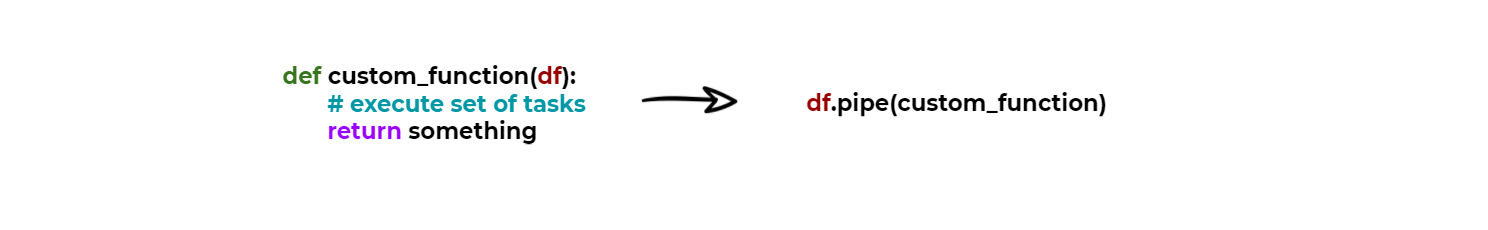

The function `.pipe()` is used to apply a function with arguments to a Pandas Series or DataFrame.
  * The function documentation can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html) 
  * We consider the `diamonds` dataset

df = sns.load_dataset('diamonds')
df= df.head(50)
df.head(10)

Consider we have customers interested in diamonds with specific characteristics, which are carat, cut, color and price.

Some are more interested in the carat of the diamond, while others are more interested in the cut.
We can write a function to return us a DataFrame based on these characteristics.

* I create a function called `carat_and_cut_selection()`

def color_and_cut_selection(df, sort_variables):
  '''
  I make a copy of the DataFrame as using pipe will overwrite it
  I use the chaining method to keep things neat
  And I use querys to retrieve the data my customers are interested in
  I sort the data then on cut and color using the default value 
  And return the DataFrame having only the columns of interest
  '''
  df = df.copy()
  df = (df
        .query('color in ["E"]')
        .query('cut == "Ideal" | cut == "Premium"')
        .sort_values(by=sort_variables, ascending=False)
        )
  return df


Then we use the function in `.pipe()`

# Within the pipe pass in the function and the argument to sort the data by
# In this case only the function is passed in, 
# and the data is sorted based on the functions default value

df.pipe(color_and_cut_selection, sort_variables=['cut', 'carat'])

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : In this practice, have a go at creating a function to be used in the pipe function.

Create a function named `CalculateTipPerception`, which will take only one argument, the DataFrame.

The function should create a column named **TipPerception**, and assign it the following:
* Using the apply function on the tip column and within the apply function, use a lambda function to check if the tip is greater than 3 and have it return **Could be better** or **Nice**.

It should then return the DataFrame.

df_practice = sns.load_dataset('tips')
print(f"DataFrame shape: {df_practice.shape}")
df_practice.head(10)

# Write your function here.
def CalculateTipPerception(df):
    df['TipPerception'] = df['tip'].apply(lambda x: 'Nice' if x > 3 else 'Could be better')
    return df

# Use the pipe function passing in your function, on df_practice
# Then display df_practice using head(10)
df_practice.pipe(CalculateTipPerception)

# Display the DataFrame
print(df_practice.head(10))

---